<a href="https://colab.research.google.com/github/padmajavemula/ehrapy/blob/main/Assignment4_Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PADMAJA VEMULA 04/26/2024

# <center><font color=black>Hands-on Assignment</font> </center>  
## <font color=black>Complete the following section on Supervised Machine Learning: </font>


# <center><font color=green>Breast Cancer Prediction</font> </center>

## STEP 1: Import Libraries
- import numpy as np
- import pandas as pd
- import matplotlib.pyplot as plt
- %matplotlib inline


### Purpose:

We start by importing necessary Python libraries that provide tools for data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn), and suppression of warnings. These libraries form the backbone of most data science projects, offering functionalities for handling datasets, creating plots, and managing future deprecation warnings to keep our code cleaner.

In [4]:
# Importing necessary libraries for data manipulation and visualization
#Add your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
# Suppress future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


## STEP 2: Load the Data
- The dataset is loaded into a pandas DataFrame called data using pd.read_csv(). It contains features related to breast cancer diagnostics, including the mean radius, texture, perimeter, area, smoothness, and diagnosis (M = malignant, B = benign).
- Before plotting or data manipulation operations, ensure inf values are converted to NaN. This can be crucial for data cleaning steps, especially if your dataset might contain infinite values due to calculations or transformations.


### Purpose:

Loading the data into a Pandas DataFrame is crucial as it allows us to work with the data in a structured and efficient manner. The dataset contains features related to breast cancer diagnostics. Cleaning the data by replacing infinite values with NaN is important to prevent computational errors and biases in analysis and modeling.

In [5]:
# Load the dataset into a Pandas DataFrame and display the first 5 rows
#Add your code here
df = pd.read_csv('breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Converting inf values to NaN in your DataFrame
#Add your code here
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [7]:
# Display information about the dataset including the number of non-null entries per column
#Add your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
# Set the visual style of seaborn plots to 'whitegrid' for better readability
#Add your code here
sns.set_style('whitegrid')

<Axes: xlabel='diagnosis', ylabel='count'>

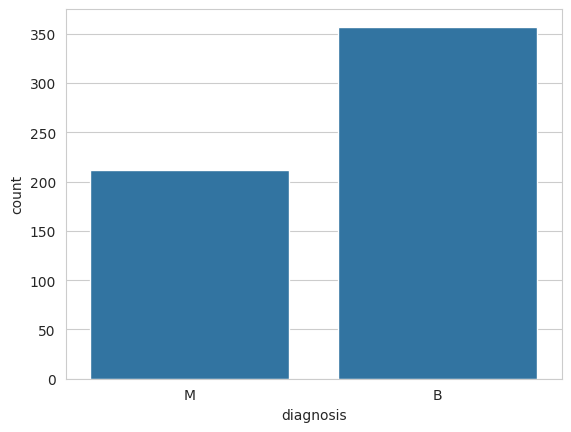

In [9]:
# Create a count plot to visualize the distribution of diagnoses ('M' for malignant, 'B' for benign)
#Add your code here
sns.countplot(x='diagnosis', data=df)


## STEP 3: Data Cleaning and Preprocessing
- The 'diagnosis' column, which is categorical, is converted to numerical format: M (malignant) to 1, and B (benign) to 0, making it suitable for machine learning algorithms.
- Unnecessary columns, including 'Unnamed: 32' and 'id', are dropped as they do not contribute to diagnosis prediction.

### Purpose:

This step converts categorical data ('diagnosis') into a numerical format which is essential for machine learning models, as they require numerical inputs. Dropping unnecessary columns like 'Unnamed: 32' and 'id' helps focus on relevant features that potentially influence the prediction, thus simplifying the dataset and improving model performance.

In [10]:
# Replace categorical diagnosis values ('M' and 'B') with numerical values (1 and 0)
#Add your code here
dataset = df
dataset['diagnosis'].replace(['M', 'B'], [1, 0], inplace=True)

In [11]:
# Drop the 'Unnamed: 32' column as it contains only NaN values and is not useful for analysis
#Add your code here
#Already droped in colab notes



## STEP 4: Exploratory Data Analysis (EDA)
- A count plot for the 'diagnosis' column is created to visualize the distribution of diagnoses.
- A correlation matrix heatmap is generated to visualize the correlation between different features. High correlation between features can suggest potential predictors for the diagnosis.

### Purpose:

EDA is key to understanding the distributions, relationships, and potential trends in the dataset. Through visualizations like count plots, box plots, and heatmaps, we can identify patterns, outliers, and correlations between features. This insight guides feature selection and model choice by highlighting important predictors and informing data cleaning strategies.

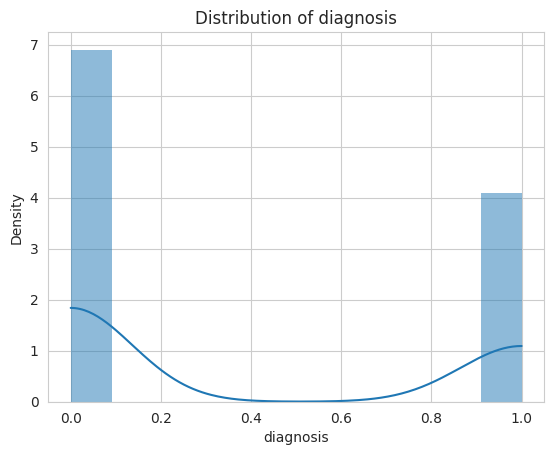

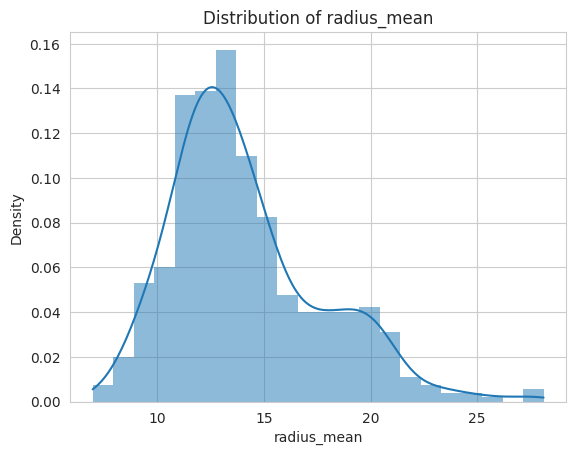

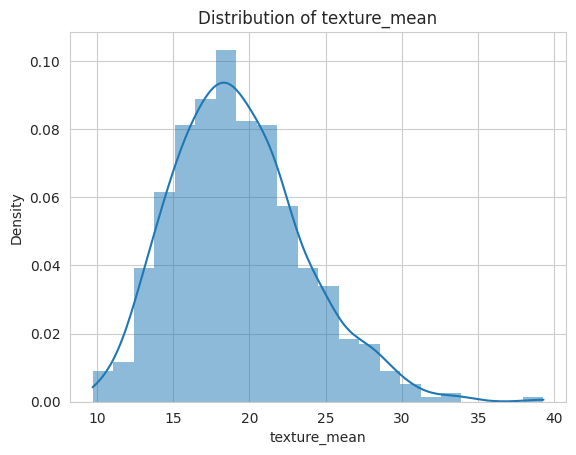

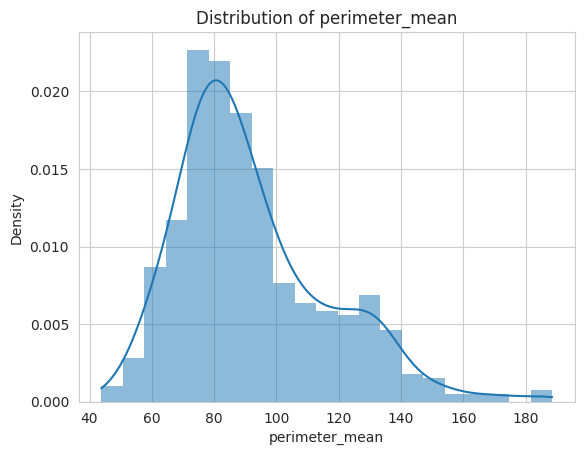

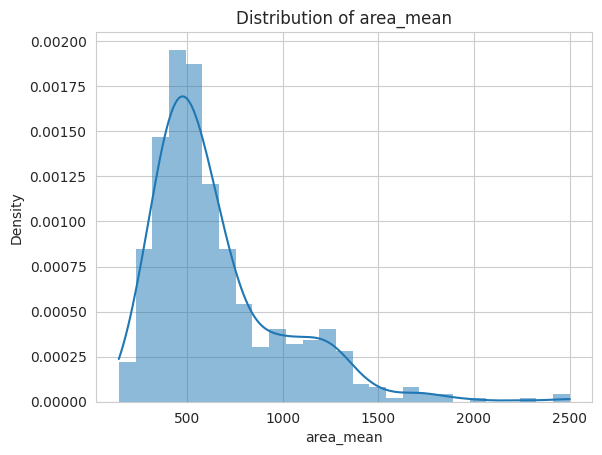

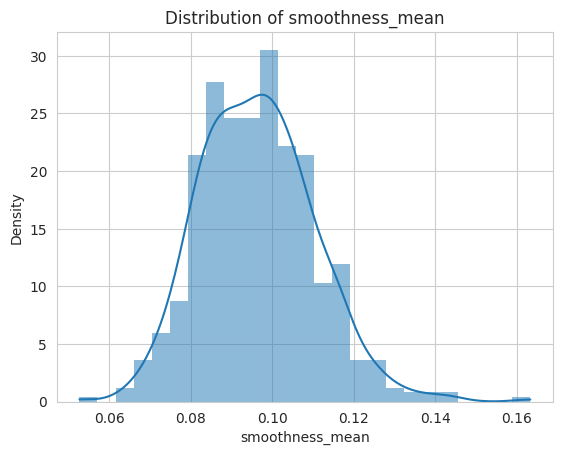

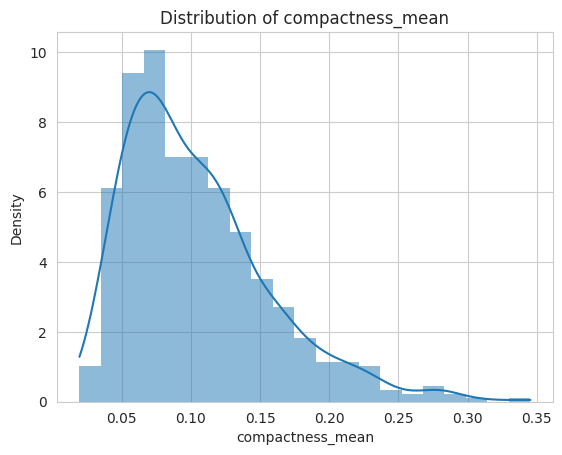

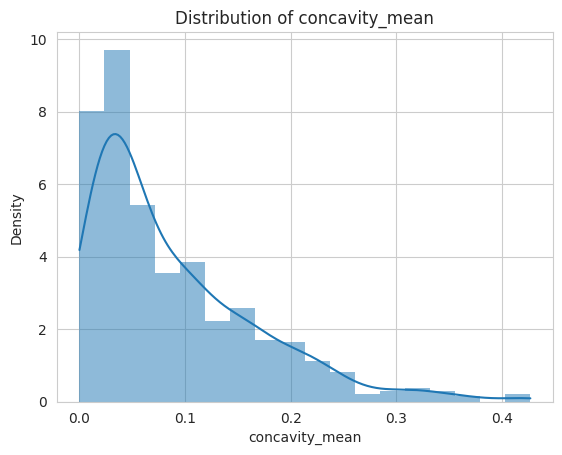

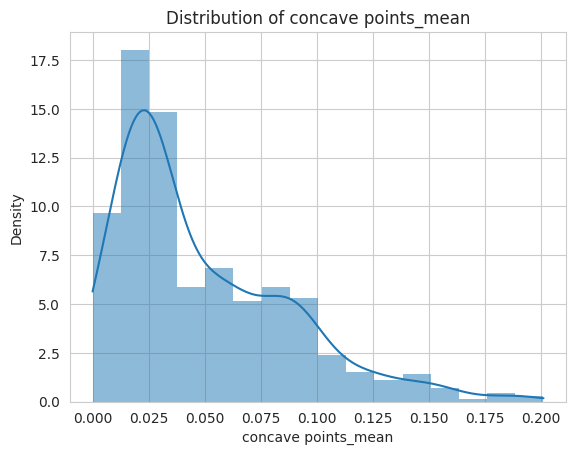

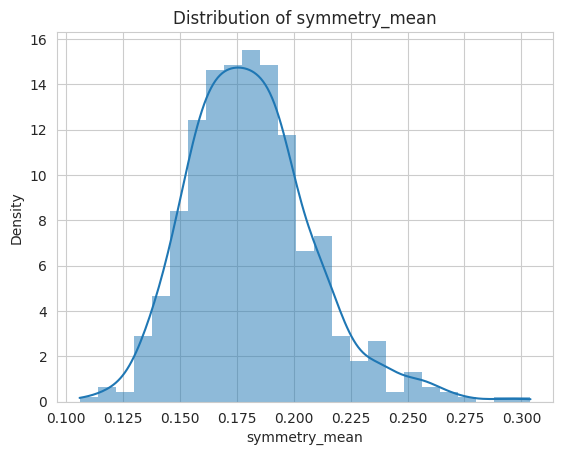

In [12]:
# Visualizing the distribution of features
#Add your code here
features_mean = list(df.columns[1:11])
for feature in features_mean:
 sns.histplot(df[feature], kde=True, stat="density", linewidth=0)
 plt.title(f'Distribution of {feature}')
 plt.show()


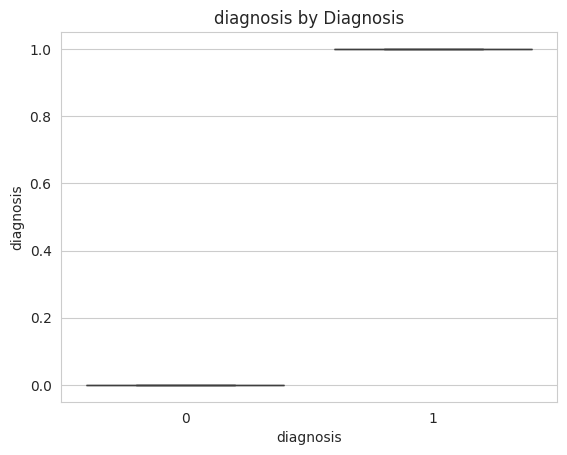

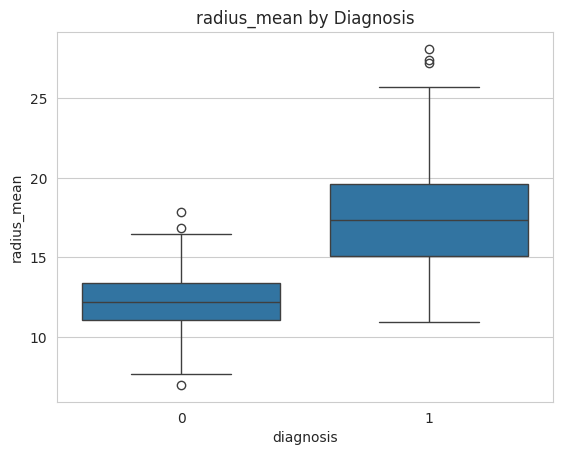

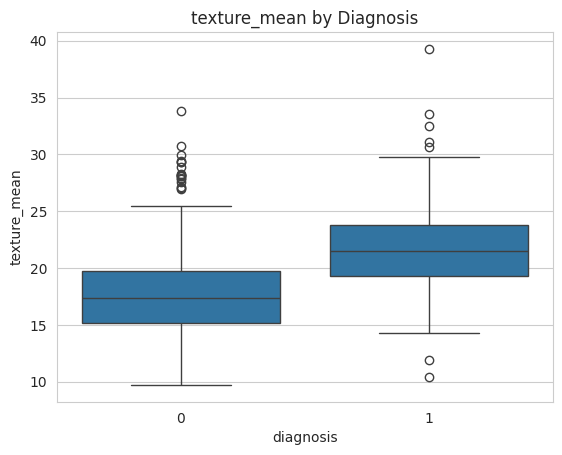

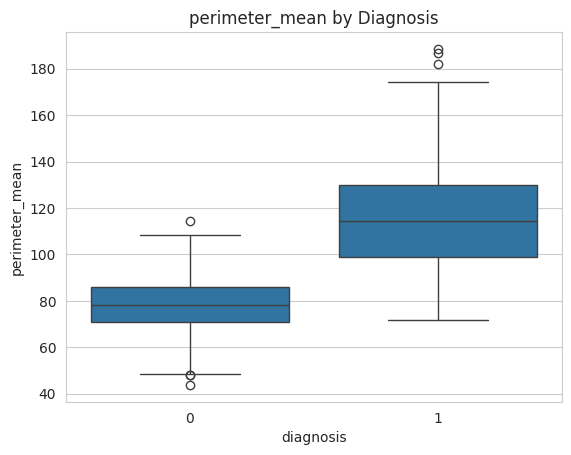

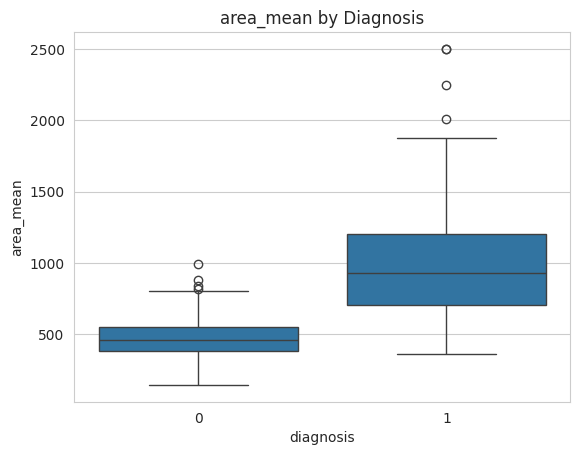

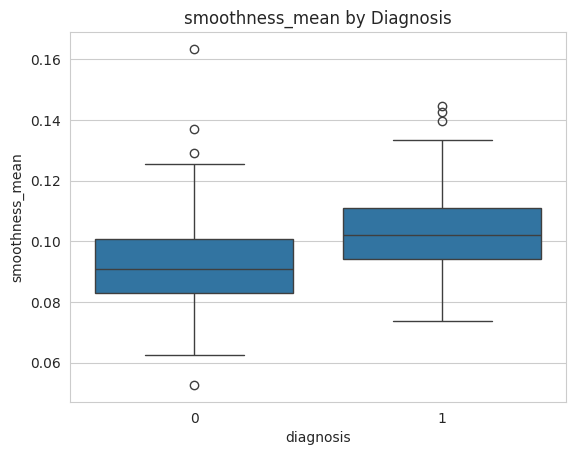

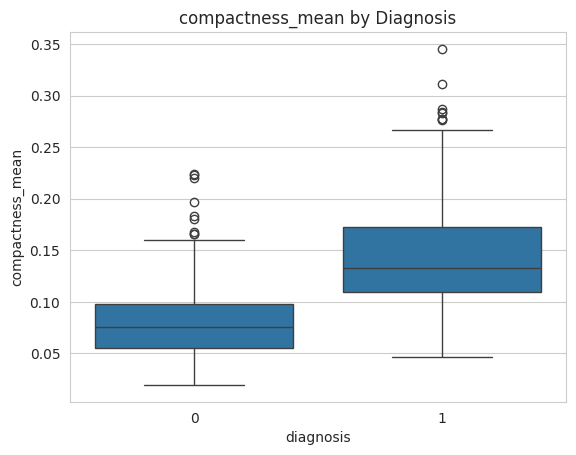

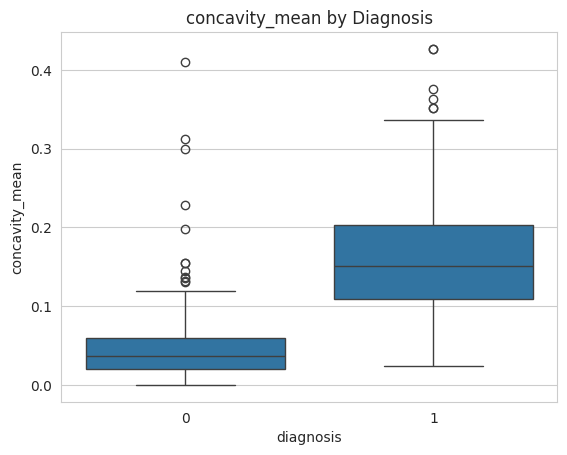

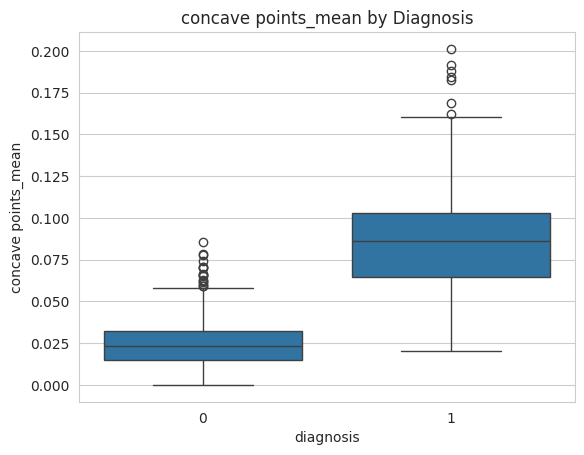

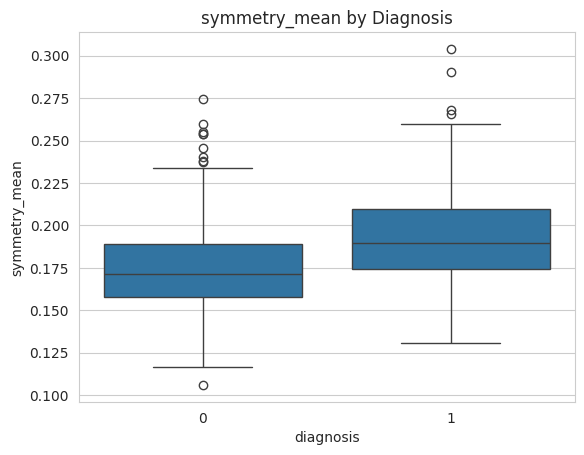

In [13]:
# Box plots to see the distribution of features by diagnosis
#Add your code here
for feature in features_mean:
 sns.boxplot(x='diagnosis', y=feature, data=df)
 plt.title(f'{feature} by Diagnosis')
 plt.show()

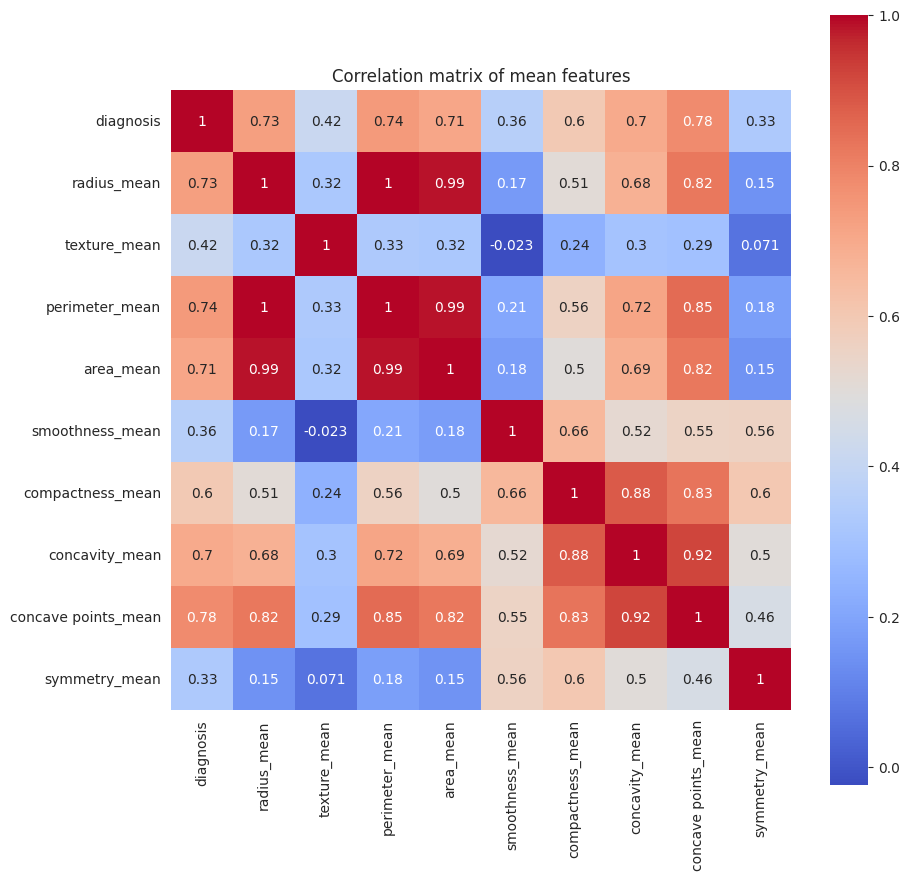

In [14]:
# Correlation matrix heatmap to identify potential relationships
#Add your code here
plt.figure(figsize=(10, 10))
sns.heatmap(df[features_mean].corr(), annot=True, square=True, cmap='coolwarm')
plt.title('Correlation matrix of mean features')
plt.show()

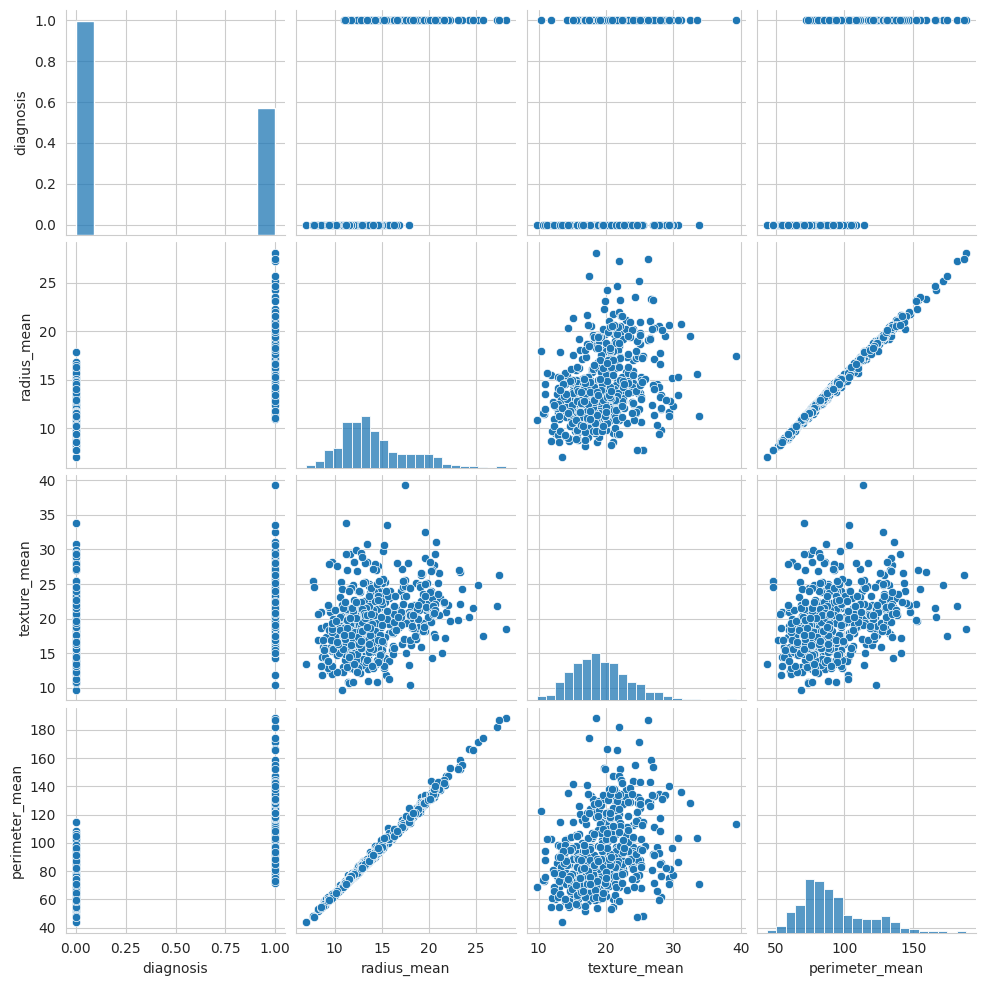

In [15]:
# Pair plot to visualize pairwise relationships between features (subset for clarity)
#Add your code here
sns.pairplot(df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']])
plt.show()


<Axes: >

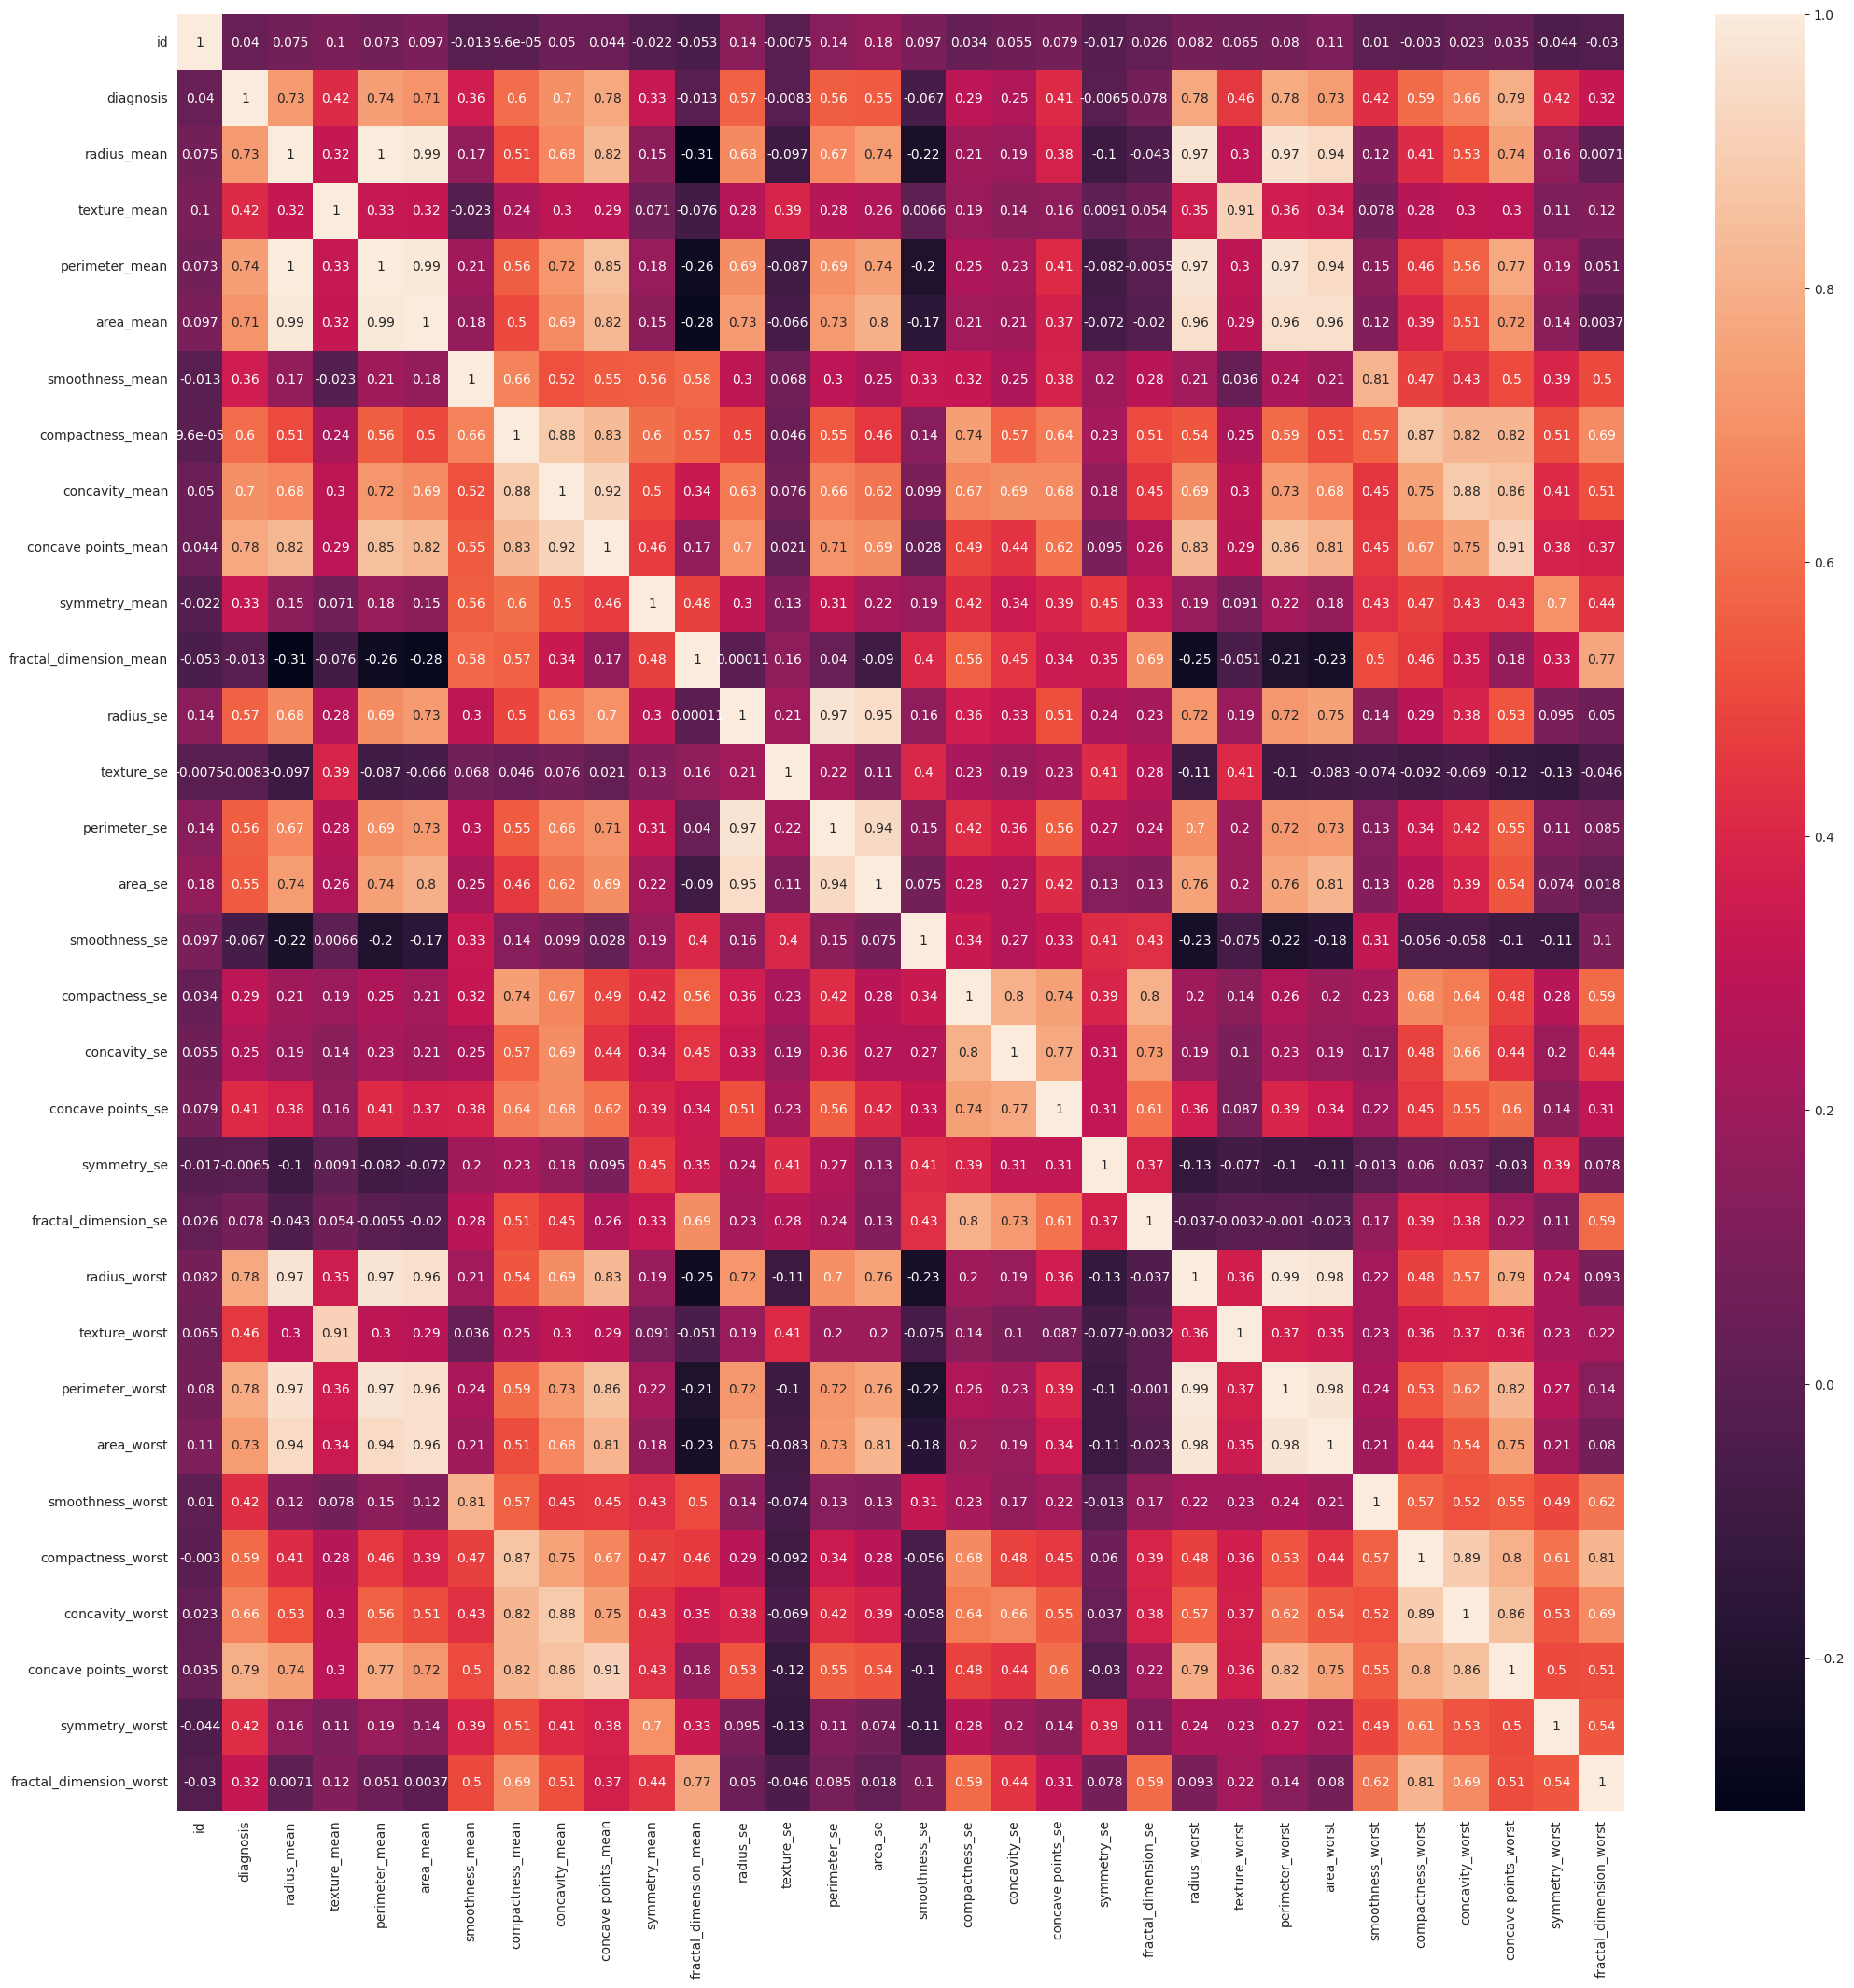

In [16]:
# Calculate and display the correlation matrix using a heatmap
#Add your code here
corr = dataset.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(corr, annot=True)


In [17]:
# Drop columns that are not relevant to the analysis or prediction
#Add your code here
dataset.drop(['id', 'symmetry_se', 'smoothness_se', 'texture_se', 'fractal_dimension_se'], axis=1, inplace=True)

## STEP 5: Data Preparation for Machine Learning
- The dataset is split into features (X) and target (y) where y is the diagnosis column.
- The dataset is further split into training and testing sets to evaluate the performance of the machine learning model.

### Purpose:

Splitting the dataset into features (X) and target (y), and then into training and testing sets, prepares the data for model training and evaluation. This separation allows the model to learn from one subset of the data (training) and then be evaluated on an unseen subset (testing), which helps in assessing the model's performance and generalization capability.

In [18]:
# Separate the dataset into features (X) and target variable (y)
#Add your code here
X = dataset.drop('diagnosis', axis=1)
y = dataset['diagnosis']

In [19]:
# Split the dataset into training and testing sets
#Add your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train Set: ", X_train.shape, y_train.shape)
print("Test Set: ", X_test.shape, y_test.shape)

Train Set:  (455, 26) (455,)
Test Set:  (114, 26) (114,)


## STEP 6: Model Training and Evaluation
- A RandomForestClassifier model is trained on the dataset.
- The model's performance is evaluated using a confusion matrix and accuracy score, achieving a high accuracy rate.

### Purpose:

Training a RandomForestClassifier model and evaluating its performance with metrics like accuracy and a confusion matrix helps in understanding how well the model can predict breast cancer based on the provided features. This step is crucial for determining the effectiveness of the model in distinguishing between malignant and benign tumors.

In [20]:
# Train a RandomForestClassifier on the training set
#Add your code here
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [30]:
RandomForestClassifier(n_estimators=20)

RandomForestClassifier(n_estimators=20)

In [23]:
# Evaluate the model using confusion matrix and accuracy score
#Add your code here
from sklearn.metrics import confusion_matrix, accuracy_score
print(f"Accuracy is {round(accuracy_score(y_test, model.predict(X_test)) * 100, 2)}%")

Accuracy is 95.61%


## STEP 7: Hyperparameter Tuning
- RandomizedSearchCV is used to perform hyperparameter tuning on the RandomForestClassifier to find the best parameters for the model.
- The tuned model is then re-evaluated, showing an improved accuracy score.


### Purpose:

Hyperparameter tuning is a process of finding the optimal model parameters that lead to the best performance. Using techniques like RandomizedSearchCV, we can systematically explore a range of parameters to improve the model. This step is vital for enhancing model accuracy and ensuring that the model is as refined and effective as possible before deployment or further analysis.

In [24]:
# Perform hyperparameter tuning using RandomizedSearchCV
#Add your code here
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
classifier = RandomForestClassifier(n_jobs=-1)
param_dist = {
 'max_depth': [3, 5, 10, None],
 'n_estimators': [10, 100, 200, 300, 400, 500],
 'max_features': randint(1, 27),
 'criterion': ['gini', 'entropy'],
 'bootstrap': [True, False],
 'min_samples_leaf': randint(1, 27),
}
search_clfr = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

In [25]:
RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40, n_jobs=-1,
param_distributions={
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'max_features': 2,  # replace the scipy object with an integer
    'min_samples_leaf': 5,  # replace the scipy object with an integer
    'n_estimators': [10, 100, 200, 300, 400, 500]})

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(n_jobs=-1), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': 2,
                                        'min_samples_leaf': 5,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]})

In [ ]:
# Display the best parameters and score from the hyperparameter tuning
#Add your code here


In [ ]:
# Import the required modules.
from sklearn.model_selection import RandomizedSearchCV

# Check if the variable 'search_clfr' is defined.
if 'search_clfr' not in globals():
    print('The variable "search_clfr" is not defined.')
else:
    # Check if the 'best_params_' attribute exists for the 'search_clfr' object.
    if not hasattr(search_clfr, 'best_params_'):
        print('The "best_params_" attribute does not exist for the "search_clfr" object.')
    else:
        # Extract the best parameters and score.
        params = search_clfr.best_params_
        score = search_clfr.best_score_

        # Print the results.
        print('Best Parameters:')
        print(params)
        print('Best Score:')
        print(score)

The "best_params_" attribute does not exist for the "search_clfr" object.


In [ ]:
# Train a new classifier using the best parameters found from the RandomizedSearchCV
#Add your code here
classifier = RandomForestClassifier(n_jobs=-1, n_estimators=200, bootstrap= True)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1)

In [ ]:
# Evaluate the new classifier
#Add your code here
print(f"Accuracy is {round(accuracy_score(y_test, classifier.predict(X_test)))}")

Accuracy is 1


## Good Job!